In [5]:
!pip install transformers

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/final_reviews (1).csv')

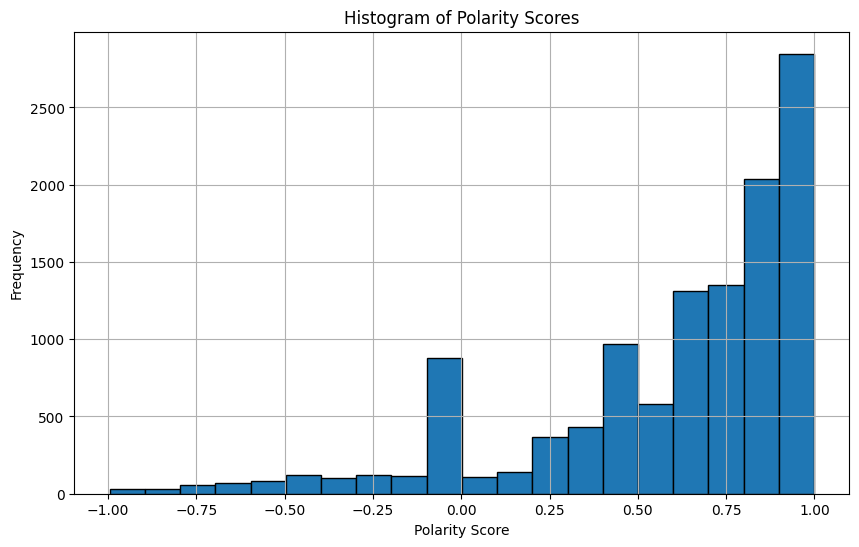

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['polarity_score'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

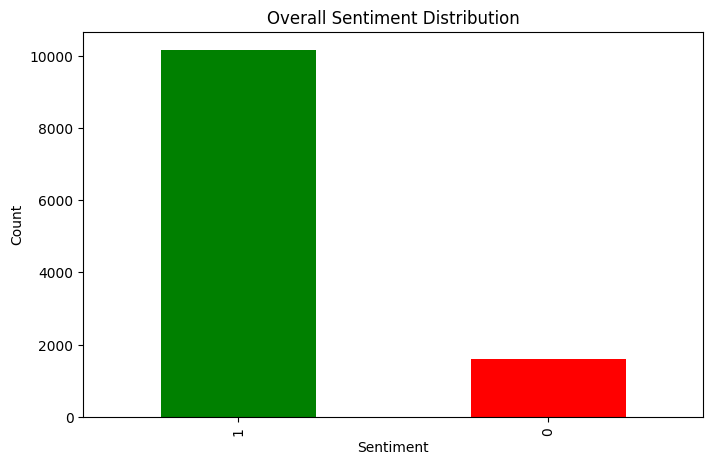

In [19]:
plt.figure(figsize=(8, 5))
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


<ipython-input-22-5e4c47840ae1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


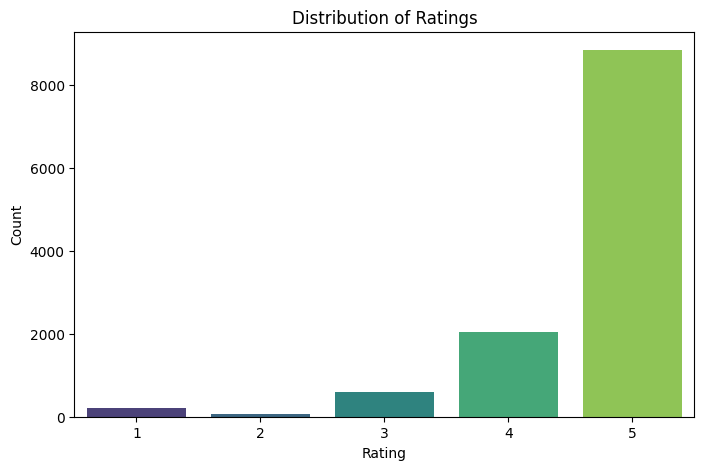

In [22]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


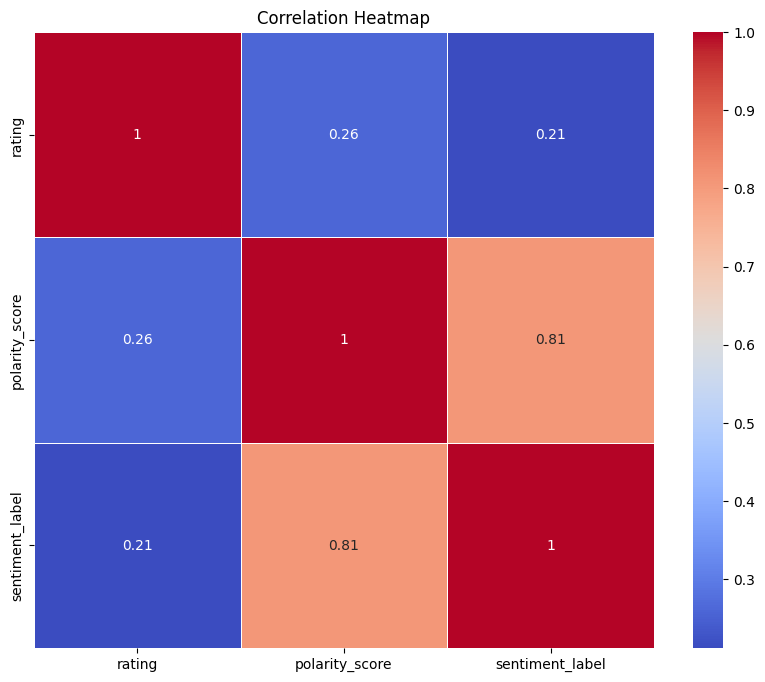

In [24]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['rating', 'polarity_score', 'sentiment_label']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


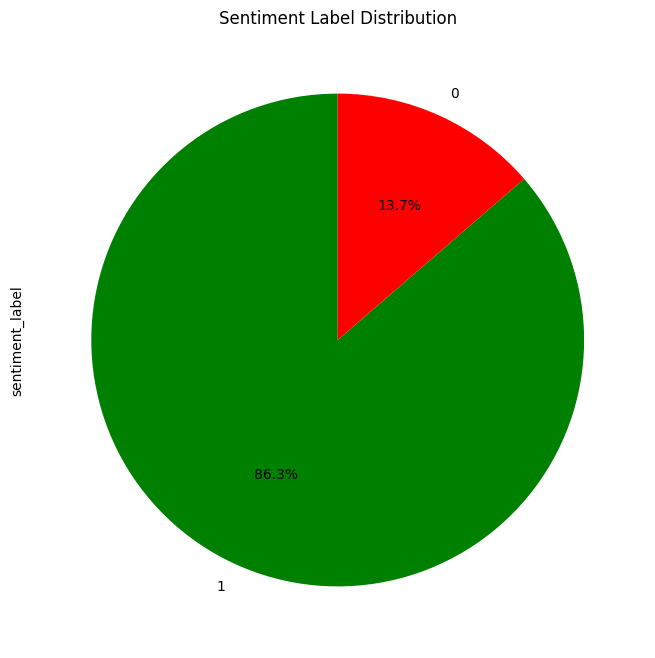

In [25]:
plt.figure(figsize=(8, 8))
df['sentiment_label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Sentiment Label Distribution')
plt.show()


Topic Modelling

In [32]:
# Drop rows with missing reviews
df = df.dropna(subset=['review'])

# Assuming your reviews are stored in a DataFrame named 'df' with a 'review' column
documents = df['review'].tolist()

# Tokenize and vectorize the text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(documents)

# Apply LDA
num_topics = 10  # You can adjust the number of topics based on your preference
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTopic #{topic_idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])

# Assign topics to the reviews
df['topic'] = lda.transform(X).argmax(axis=1)

# Display the DataFrame with assigned topics
print(df[['review', 'topic']])



Topic #1:
['head', 'brush', 'battery', 'replacement', 'work', 'charge', 'water', 'sonicare', 'model', 'toothbrush']

Topic #2:
['floss', 'great', 'work', 'use', 'teeth', 'easy', 'price', 'product', 'like', 'good']

Topic #3:
['whitening', 'teeth', 'dental', 'strip', 'smile', 'result', 'gum', 'use', 'effective', 'sensitivity']

Topic #4:
['teeth', 'product', 'mouth', 'guard', 'denture', 'night', 'time', 'use', 'day', 'fit']

Topic #5:
['oral', 'care', 'routine', 'hygiene', 'cleaning', 'clean', 'water', 'dental', 'effective', 'make']

Topic #6:
['teeth', 'gum', 'use', 'using', 'dentist', 'mouth', 'day', 'like', 'im', 'time']

Topic #7:
['toothpaste', 'taste', 'like', 'flavor', 'teeth', 'product', 'good', 'great', 'mouth', 'clean']

Topic #8:
['water', 'use', 'like', 'time', 'travel', 'good', 'easy', 'size', 'product', 'dont']

Topic #9:
['tongue', 'oil', 'scraper', 'love', 'coconut', 'pulling', 'la', 'que', 'el', 'product']

Topic #10:
['toothbrush', 'brush', 'head', 'teeth', 'bristle',